In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\gowth\OneDrive\Desktop\CSV\sales_data.csv")

In [3]:
df.isnull().sum()

Date                 38
Store ID             37
Product ID           38
Units Sold           42
Sales Amount         10
Discount Applied     38
Customer Segment     19
Location             38
Payment Method        2
Employee ID          38
Promotion Applied    11
dtype: int64

In [4]:
print(df.dtypes)

Date                  object
Store ID              object
Product ID            object
Units Sold           float64
Sales Amount         float64
Discount Applied     float64
Customer Segment      object
Location              object
Payment Method        object
Employee ID           object
Promotion Applied     object
dtype: object


In [5]:
# Fill or drop missing values based on analysis
# For instance, we might fill missing numerical columns with the mean or median
# and categorical ones with mode or a placeholder (e.g., 'Unknown')
# Fill missing values for categorical and numerical columns without chained assignment warnings


for column in df.columns:
    if df[column].dtype == 'object':
        df = df.assign(**{column: df[column].fillna(df[column].mode()[0])})
    else:
        df = df.assign(**{column: df[column].fillna(df[column].mean())})

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Date                 0
Store ID             0
Product ID           0
Units Sold           0
Sales Amount         0
Discount Applied     0
Customer Segment     0
Location             0
Payment Method       0
Employee ID          0
Promotion Applied    0
dtype: int64


In [6]:
df = df[df['Store ID'].str.lower() != 'unknown']


In [7]:
# Convert any date columns to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Confirm the conversion and check for any issues
print(df.dtypes)


Date                 datetime64[ns]
Store ID                     object
Product ID                   object
Units Sold                  float64
Sales Amount                float64
Discount Applied            float64
Customer Segment             object
Location                     object
Payment Method               object
Employee ID                  object
Promotion Applied            object
dtype: object


In [8]:

print("After changeing the datatype for Date it has some null values \n",df.isnull().sum())


After changeing the datatype for Date it has some null values 
 Date                 188
Store ID               0
Product ID             0
Units Sold             0
Sales Amount           0
Discount Applied       0
Customer Segment       0
Location               0
Payment Method         0
Employee ID            0
Promotion Applied      0
dtype: int64


In [9]:
# Missing values are handled

df = df.dropna(subset=['Date'])
df.isnull().sum()

Date                 0
Store ID             0
Product ID           0
Units Sold           0
Sales Amount         0
Discount Applied     0
Customer Segment     0
Location             0
Payment Method       0
Employee ID          0
Promotion Applied    0
dtype: int64

In [10]:
# Define a function to remove outliers using Z-score or IQR
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to relevant columns, e.g., 'Sales'
df = remove_outliers(df, 'Sales Amount')

In [11]:
# Aggregate by date
sales_by_date = df.groupby('Date')['Sales Amount'].sum()

# Aggregate by store (using 'Store ID' instead of 'Store' as per your data)
sales_by_store = df.groupby('Store ID')['Sales Amount'].sum()

# Aggregate by product (using 'Product ID' instead of 'Product')
sales_by_product = df.groupby('Product ID')['Sales Amount'].sum()



In [12]:
# Total and average sales per product
total_sales_per_product = df.groupby('Product ID')['Sales Amount'].sum()
average_sales_per_product = df.groupby('Product ID')['Sales Amount'].mean()


In [13]:
# Store with the highest total sales
top_store = sales_by_store.idxmax()
top_store_sales = sales_by_store.max()
print(f"Top performing store: {top_store} with sales of {top_store_sales}")


Top performing store: S001 with sales of 32194.86


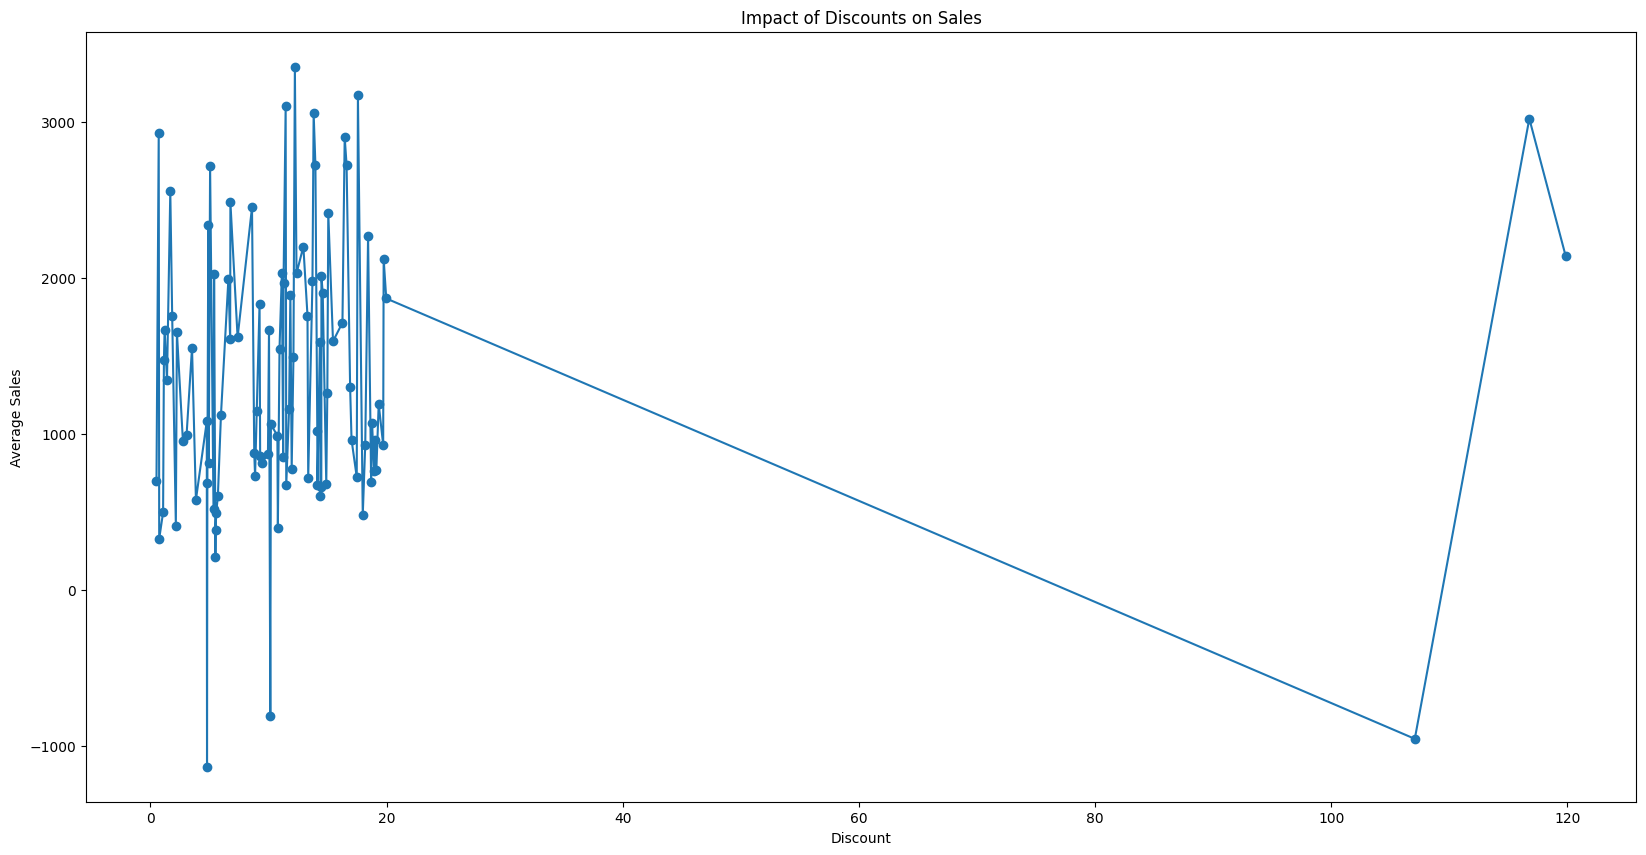

In [14]:
# Assuming there's a 'Discount' column, analyze its impact on sales
discount_sales = df.groupby('Discount Applied')['Sales Amount'].mean()

# Plot the impact of discount on sales
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(discount_sales.index, discount_sales.values, marker='o')
plt.title("Impact of Discounts on Sales")
plt.xlabel("Discount")
plt.ylabel("Average Sales")
plt.show()


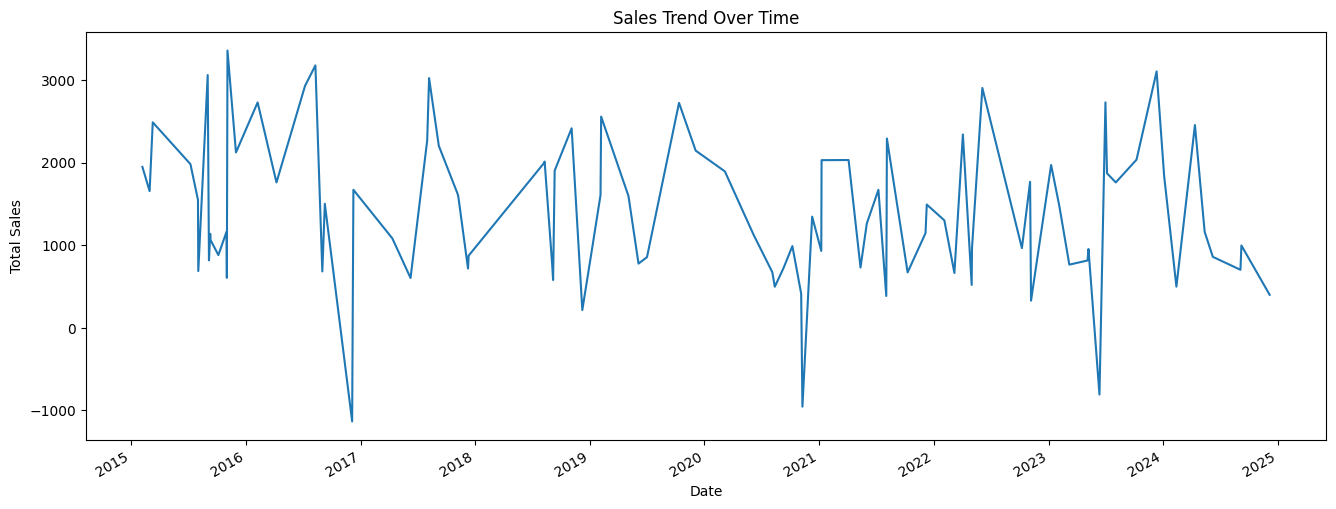

In [15]:
# Plot sales trend over time
plt.figure(figsize=(16, 6))
sales_by_date.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


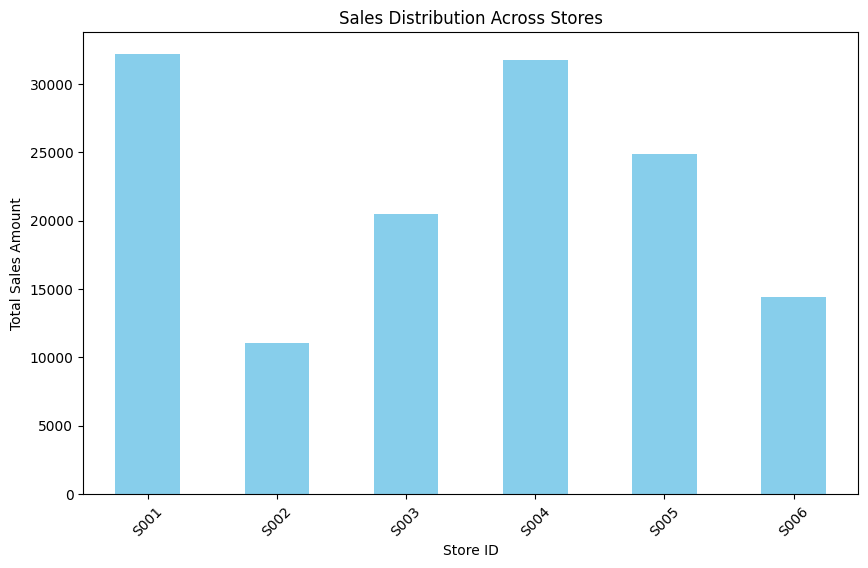

In [16]:
# Bar plot for sales distribution across stores
plt.figure(figsize=(10, 6))
sales_by_store.plot(kind='bar', color='skyblue')
plt.title("Sales Distribution Across Stores")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()



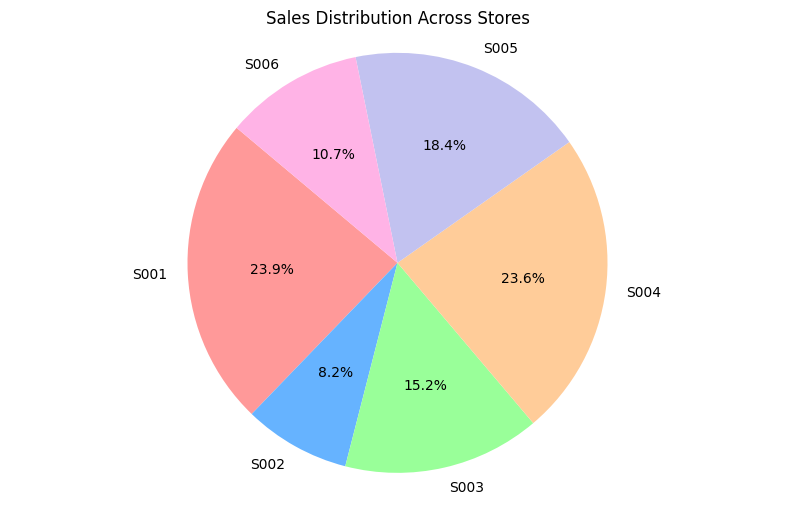

In [17]:
# Assuming 'sales_by_store' is a pandas Series with Store IDs as the index and total sales amounts as the values
plt.figure(figsize=(10, 6))

# Define a list of unique colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', 
          '#ffb3e6', '#c2f0c2', '#ff6666', '#ffccff', '#ffff99']

plt.pie(sales_by_store, labels=sales_by_store.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sales Distribution Across Stores")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

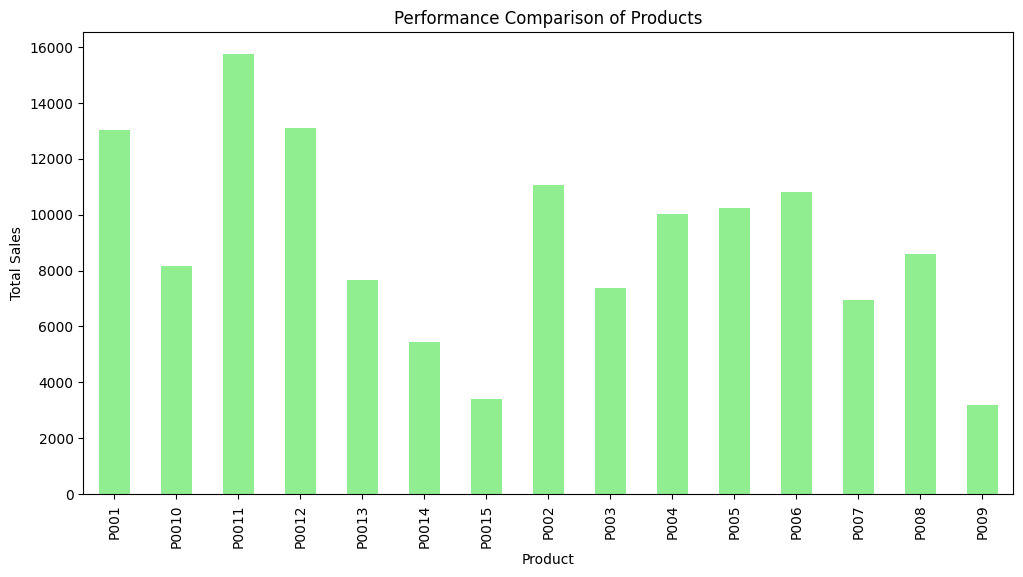

In [18]:
# Plot sales for each product
plt.figure(figsize=(12, 6))
total_sales_per_product.plot(kind='bar', color='lightgreen')
plt.title("Performance Comparison of Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()


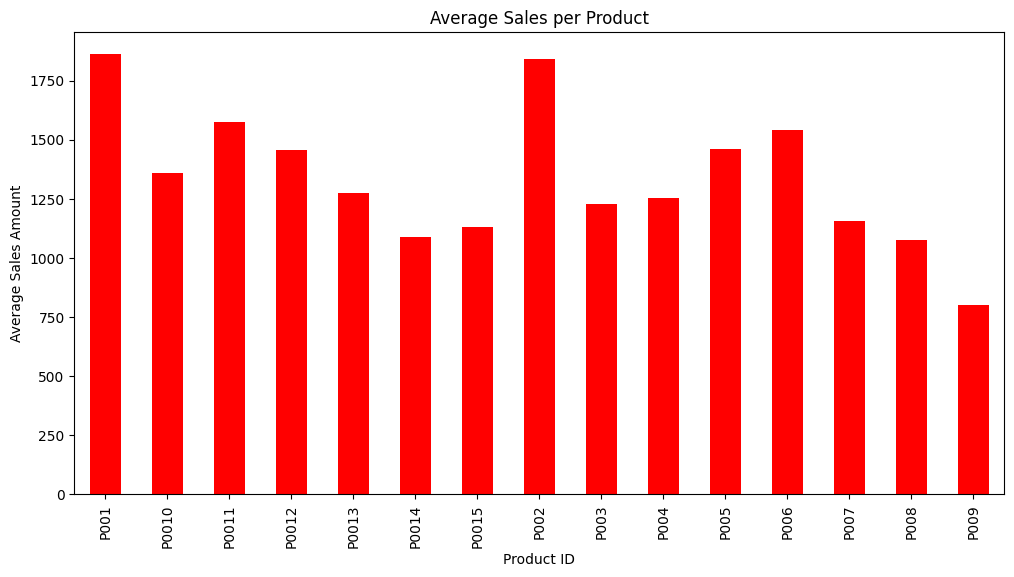

In [19]:
# Plot average sales per product
plt.figure(figsize=(12, 6))
average_sales_per_product.plot(kind='bar', color='red')
plt.title("Average Sales per Product")
plt.xlabel("Product ID")
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=90)
plt.show()

C:\Users\gowth\AppData\Local\Temp\ipykernel_31424\731402342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Sales Amount', data=location_sales, palette="viridis")


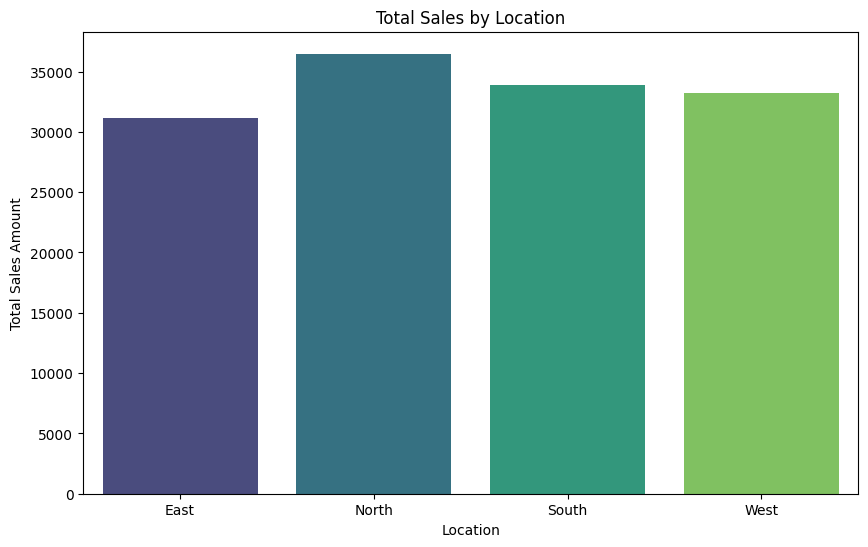

In [20]:
# Location-wise Sales
location_sales = df.groupby('Location')['Sales Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Sales Amount', data=location_sales, palette="viridis")
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales Amount')
plt.show()

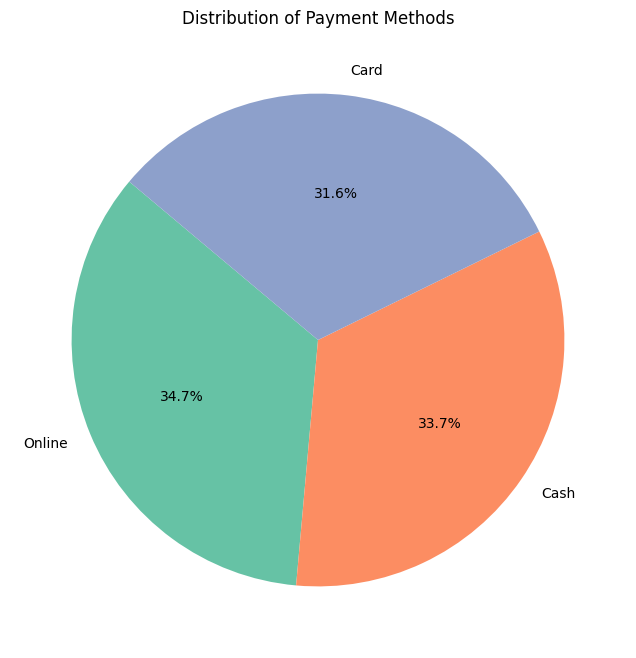

In [21]:
# Most Used Payment Method
payment_method_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Payment Methods')
plt.show()

In [22]:
#cleaned dataset is saved in as new dataset
df.to_csv(r"C:\Users\gowth\OneDrive\Desktop\new.csv")

In [4]:
data=pd.read_csv(r"C:\Users\gowth\OneDrive\Desktop\new.csv")
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Store ID', 'Product ID', 'Units Sold',
       'Sales Amount', 'Discount Applied', 'Customer Segment', 'Location',
       'Payment Method', 'Employee ID', 'Promotion Applied'],
      dtype='object')


In [25]:
pip install dash

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 598.5 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/7.8 MB 598.5 kB/s eta 0:00:13
   ---- ----------------------------------- 0.8/7.8 MB 588.4 kB/s eta 0:00:12
   ---- ----------------------------------- 0.8/7.8 MB 588.4 kB/s eta 0:00:12
   ---- ----------------------------------- 0.8/7.8 MB 588.4 kB/s eta 0:00:12
   ----- ---------------------------------- 1.0/7.8 MB 535.4 kB/s eta 0:00:13
   ----- ---------------------------------- 1.0/7.8 MB 535.4 kB/s eta 0:00:13
   ------ ------------------------------

In [8]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\gowth\OneDrive\Desktop\new.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year for easier filtering
data['Year'] = data['Date'].dt.year

# Initialize the Dash app
app = dash.Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Comprehensive Sales Data Dashboard"),
    
    # Year Filter Dropdown
    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(data['Year'].dropna().unique())],
        placeholder="Select a Year",
        clearable=True
    ),
    
    # Overview Tab
    dcc.Tabs([
        dcc.Tab(label='Overview', children=[
            html.H2("Overall Sales Statistics"),
            html.Div([
                html.Div(id='total-sales', style={'display': 'inline-block', 'margin': '20px'}),
                html.Div(id='average-discount', style={'display': 'inline-block', 'margin': '20px'}),
                html.Div(id='total-units-sold', style={'display': 'inline-block', 'margin': '20px'}),
            ]),
            dcc.Graph(id='sales-overview-chart')
        ]),
        
        # Sales Trend Analysis Tab
        dcc.Tab(label='Sales Trend Analysis', children=[
            html.H2("Sales Trends Over Time by Store"),
            dcc.Graph(id='trend-chart')
        ]),
        
        # Store and Product Analysis Tab
        dcc.Tab(label='Store and Product Analysis', children=[
            html.H2("Sales by Store and Product"),
            dcc.Graph(id='store-sales-chart'),
            dcc.Graph(id='product-sales-chart')
        ]),
        
        # Customer Segment and Promotion Tab
        dcc.Tab(label='Customer Segment and Promotion Analysis', children=[
            html.H2("Customer Segment and Promotion Insights"),
            dcc.Graph(id='segment-chart'),
            dcc.Graph(id='promotion-chart')
        ]),
    ])
])

# Callback to update overall sales stats
@app.callback(
    [Output('total-sales', 'children'),
     Output('average-discount', 'children'),
     Output('total-units-sold', 'children')],
    Input('year-dropdown', 'value')
)
def update_sales_stats(selected_year):
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    total_sales = filtered_data['Sales Amount'].sum()
    average_discount = filtered_data['Discount Applied'].mean()
    total_units = filtered_data['Units Sold'].sum()
    
    return (
        f"Total Sales: ${total_sales:,.2f}",
        f"Average Discount Applied: {average_discount:.2f}%",
        f"Total Units Sold: {total_units:,}"
    )

# Callback for Sales Overview chart
@app.callback(
    Output('sales-overview-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_overview_chart(selected_year):
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    fig = px.histogram(filtered_data, x='Location', y='Sales Amount', color='Store ID', barmode='group')
    fig.update_layout(title="Sales Amount by Location and Store ID")
    return fig

# Callback for Sales Trend Analysis chart (separate graphs for each store)
@app.callback(
    Output('trend-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_trend_chart(selected_year):
    # Filter data by year if a specific year is selected
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    
    # Create a line chart with a separate graph for each Store ID using facet_col
    fig = px.line(
        filtered_data,
        x='Date',
        y='Sales Amount',
        color='Store ID',
        facet_col='Store ID',
        facet_col_wrap=1,  # Arranges the charts in a vertical layout
        title="Sales Trend Over Time by Store"
    )
    
    # Update layout for better readability
    fig.update_layout(
        height=1000,  # Adjust height to fit all store plots
        showlegend=False,  # Hide legend to avoid redundancy
        xaxis_title="Date",
        yaxis_title="Sales Amount"
    )
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Simplify subplot titles
    return fig

# Callback for Store Sales chart
@app.callback(
    Output('store-sales-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_store_sales_chart(selected_year):
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    fig = px.bar(filtered_data, x='Store ID', y='Sales Amount', color='Store ID', title="Total Sales by Store ID")
    return fig

# Callback for Product Sales chart
@app.callback(
    Output('product-sales-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_product_sales_chart(selected_year):
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    fig = px.bar(filtered_data, x='Product ID', y='Units Sold', color='Product ID', title="Total Units Sold by Product ID")
    return fig

# Callback for Customer Segment chart
@app.callback(
    Output('segment-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_segment_chart(selected_year):
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    fig = px.pie(filtered_data, names='Customer Segment', title="Customer Segment Distribution")
    return fig

# Callback for Promotion Applied chart
@app.callback(
    Output('promotion-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_promotion_chart(selected_year):
    filtered_data = data[data['Year'] == selected_year] if selected_year else data
    fig = px.pie(filtered_data, names='Promotion Applied', title="Promotion Applied Distribution")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
